In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [79]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import paderbox as pb
from paderbox.visualization import plot, axes_context

from speech_disentanglement_eval.functional.factorization.dci import hinton

In [53]:
ranked_feature_names = [
    'F0semitoneFrom27.5Hz_sma3nz_amean',  # 1
    'HNRdBACF_sma3nz_amean',  #2 
    'F3frequency_sma3nz_amean',  # 3
    'F1bandwidth_sma3nz_amean',  # 4
    'F1frequency_sma3nz_amean',  # 5
    'hammarbergIndexV_sma3nz_amean',  # 6
    'logRelF0-H1-A3_sma3nz_amean',  # 7
    'F2frequency_sma3nz_amean',  # 8
    'alphaRatioV_sma3nz_amean',  # 9
    'F1frequency_sma3nz_stddevNorm',  # 10
]
names = [
    'F0',
    'HNR',
    'F3',
    'F1bw',
    'F1',
    'Hi',
    'H1-A3',
    'F2',
    r'$\alpha$',
    'F1std',
]

# Observation

In [120]:
path = Path('/tmp/mkuhlmann/noctua2/scratch/hpc-prf-nt1/mkuhlmann/storage/cord/d_vector/yellow_inherent_elephant/eval/asv/15/eval/sup_dci/1')
importance_matrix = np.load(path / 'importance_matrix.npz')['importance_matrix']
summary = pb.io.load(path / 'summary.yaml')
feature_names_mask = summary['feature_names_mask']
reindex = [feature_names_mask.index(feature_name) for feature_name in ranked_feature_names]
print(importance_matrix.shape)

(11, 256)


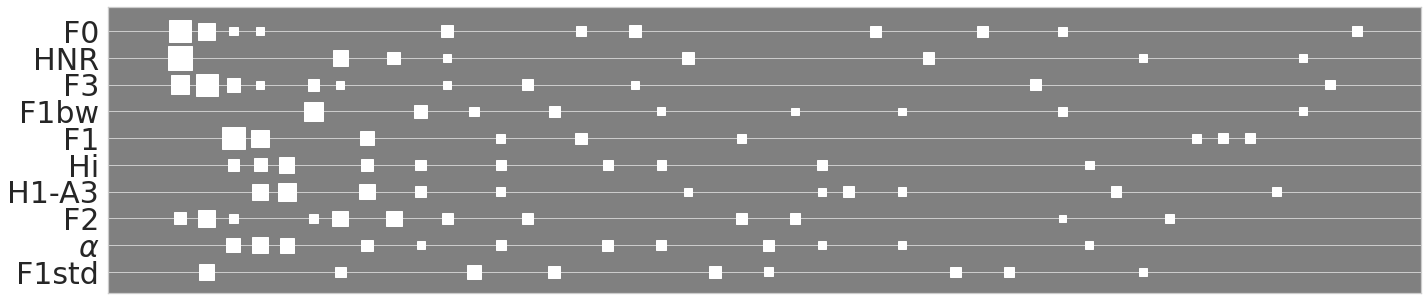

In [121]:
with axes_context(figure_size=(20, 16)) as axes:
    hinton(importance_matrix[:10][reindex].T, ax=axes.new, sort=True, threshold=0.02, names=names, labelsize=30, max_dims=45)
    plt.tight_layout()
    plt.savefig('hinton_baseline_update.eps', bbox_inches='tight')

# $\beta$-VAE with $\beta=0$

In [117]:
path = Path('/tmp/mkuhlmann/noctua1/scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_11/eval/sup_dci/2')
importance_matrix = np.load(path / 'importance_matrix.npz')['importance_matrix']
summary = pb.io.load(path / 'summary.yaml')
feature_names_mask = summary['feature_names_mask']
reindex = [feature_names_mask.index(feature_name) for feature_name in ranked_feature_names]
print(importance_matrix.shape)

(11, 128)


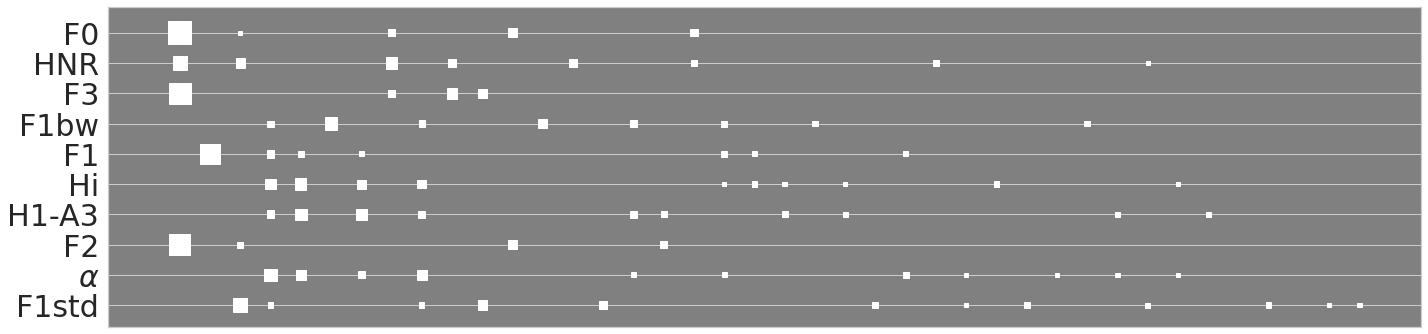

In [119]:
with axes_context(figure_size=(20, 16)) as axes:
    hinton(importance_matrix[:10][reindex].T, ax=axes.new, sort=True, threshold=0.02, names=names, labelsize=30, max_dims=40)
    plt.tight_layout()
    plt.savefig('hinton_autoencoder_update.eps', bbox_inches='tight')

# TCVAE

In [106]:
path = Path('/tmp/mkuhlmann/noctua1/scratch/hpc-prf-nt1/mkuhlmann/storage/speaker_disentanglement/libritts_31/eval/sup_dci/2')
importance_matrix = np.load(path / 'importance_matrix.npz')['importance_matrix']
summary = pb.io.load(path / 'summary.yaml')
feature_names_mask = summary['feature_names_mask']
reindex = [feature_names_mask.index(feature_name) for feature_name in ranked_feature_names]
print(importance_matrix.shape)

(11, 128)


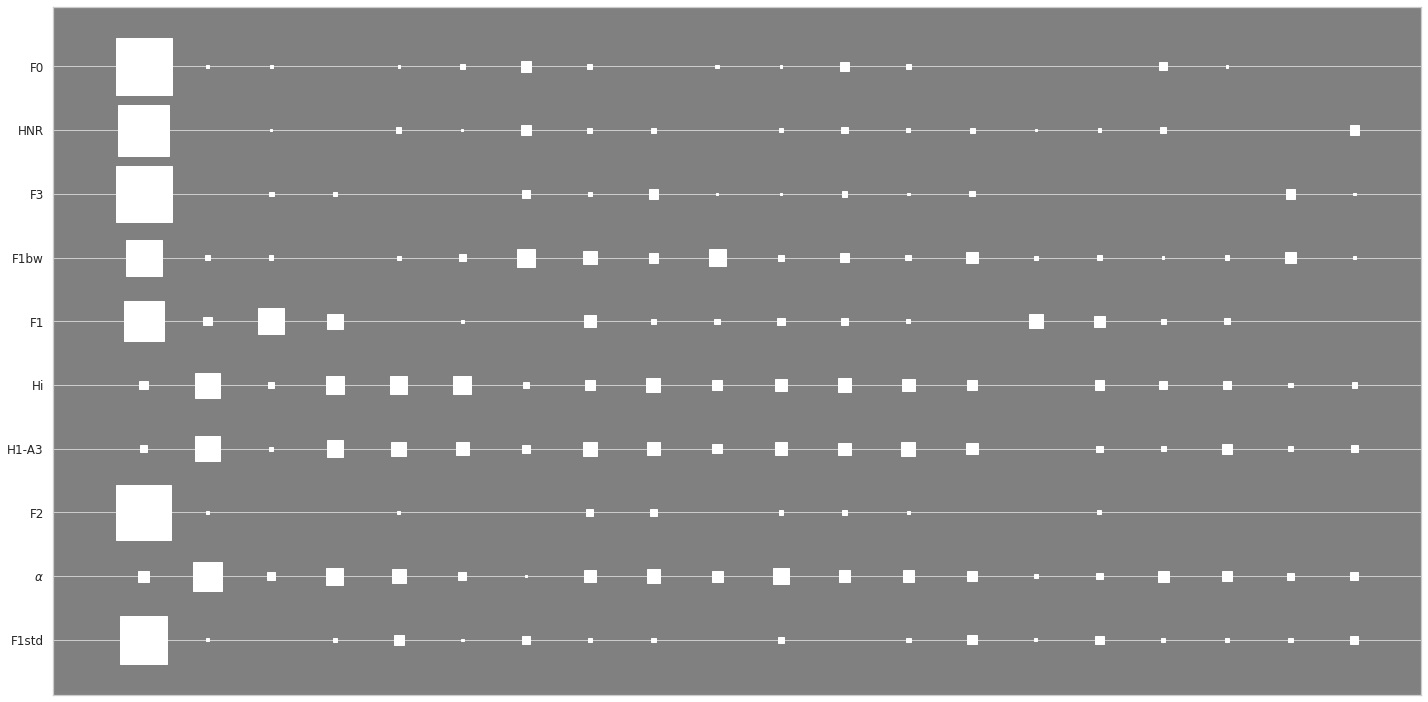

In [108]:
with axes_context(figure_size=(20, 16)) as axes:
    hinton(importance_matrix[:10][reindex].T, ax=axes.new, sort=True, threshold=1e-3, names=names, labelsize=None, max_dims=20)
    plt.tight_layout()
    # plt.savefig('hinton_tcvae_update.eps', bbox_inches='tight')